# **Importing Libraries**

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

# **Data Loading and Preprocessing**

Load the Dataset

In [109]:
data = pd.read_csv('onlinefoods.csv')
print(data.columns)

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')


Handle Missing Values

In [110]:
data['Monthly Income'] = data['Monthly Income'].replace('No Income', np.nan)

In [111]:
income_map = {
    'Lesser than 25000': 12500,
    '25001 to 50000': 37500,
    '50001 to 75000': 62500,
    '75001 to 100000': 87500,
    'More than 100000': 110000
}
data['Monthly Income'] = data['Monthly Income'].map(income_map)

In [112]:
print(data.isnull().sum())

Age                             0
Gender                          0
Marital Status                  0
Occupation                      0
Monthly Income                319
Educational Qualifications      0
Family size                     0
latitude                        0
longitude                       0
Pin code                        0
Output                          0
Feedback                        0
Unnamed: 12                     0
dtype: int64


In [113]:
numeric_features = ['Age', 'Monthly Income']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])


# **Encode Categorical Variables**

In [114]:
categorical_features = ['Marital Status', 'Occupation']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


Feature Selection

In [115]:
features = data.drop(['Feedback', 'Gender'], axis=1)
target = data['Feedback']

#  Exploratory Data Analysis

Descriptive Statistics

In [116]:
print(data.describe())

              Age  Monthly Income  Family size    latitude   longitude  \
count  388.000000            69.0   388.000000  388.000000  388.000000   
mean    24.628866         37500.0     3.280928   12.972058   77.600160   
std      2.975593             0.0     1.351025    0.044489    0.051354   
min     18.000000         37500.0     1.000000   12.865200   77.484200   
25%     23.000000         37500.0     2.000000   12.936900   77.565275   
50%     24.000000         37500.0     3.000000   12.977000   77.592100   
75%     26.000000         37500.0     4.000000   12.997025   77.630900   
max     33.000000         37500.0     6.000000   13.102000   77.758200   

            Pin code  
count     388.000000  
mean   560040.113402  
std        31.399609  
min    560001.000000  
25%    560010.750000  
50%    560033.500000  
75%    560068.000000  
max    560109.000000  


Visualizations

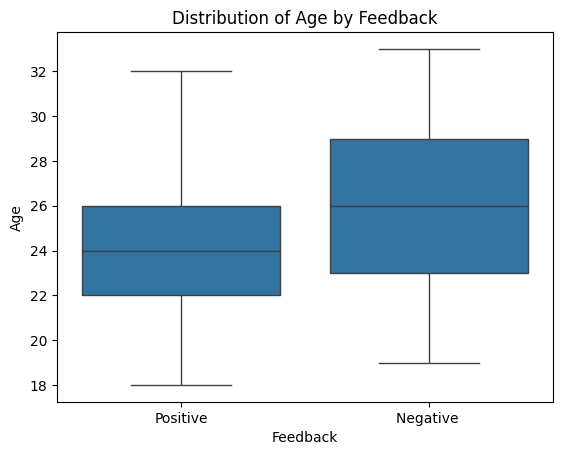

In [117]:
sns.boxplot(x='Feedback', y='Age', data=data)
plt.title('Distribution of Age by Feedback')
plt.show()

<ipython-input-118-33f82da0bd66>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


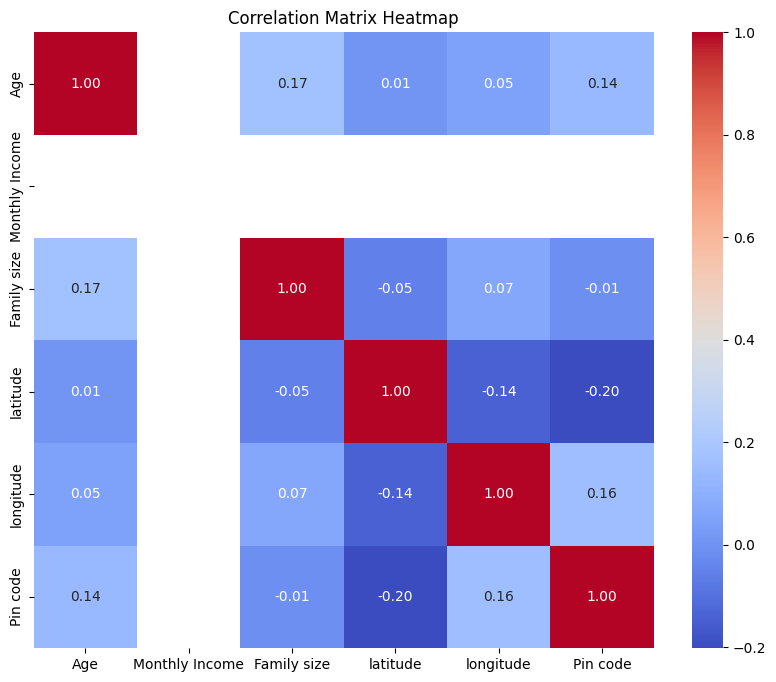

In [118]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [119]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [120]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter=1000))])

In [121]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Monthly Income']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Marital Status',
                                                   'Occupation'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [122]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)


print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8589743589743589
Confusion Matrix:
 [[ 0 11]
 [ 0 67]]


In [123]:
y_test = y_test.str.strip()

precision = precision_score(y_test, y_pred, pos_label='Positive')
recall = recall_score(y_test, y_pred, pos_label='Positive')
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8589743589743589
Precision: 0.8589743589743589
Recall: 1.0
Confusion Matrix:
 [[ 0 11]
 [ 0 67]]


In [124]:
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=categorical_features)
all_feature_names = numeric_features + list(feature_names)


In [125]:
coefficients = clf.named_steps['classifier'].coef_[0]

In [126]:
print("Number of features:", len(all_feature_names))
print("Number of coefficients:", len(coefficients))

Number of features: 9
Number of coefficients: 9


In [127]:
if len(all_feature_names) != len(coefficients):
    print("Error: Number of features does not match number of coefficients!")

In [129]:
feature_importance_df = pd.DataFrame({'Feature': all_feature_names[:-1],'Coefficient': coefficients})

ValueError: All arrays must be of the same length

In [98]:
feature_importance_df['Absolute Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)


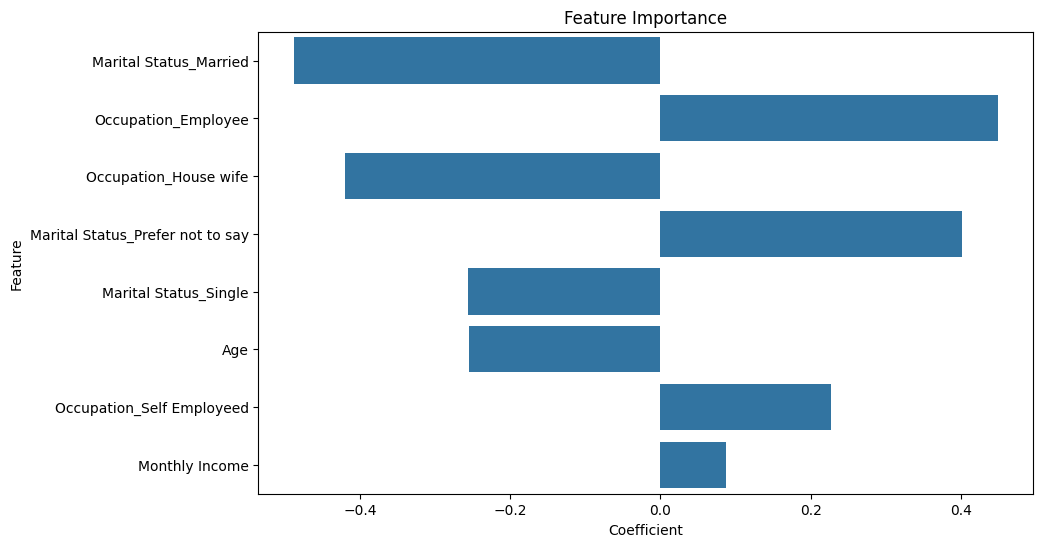

In [99]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

In [100]:
predicted_probabilities = clf.predict_proba(X_test)[:, 1]

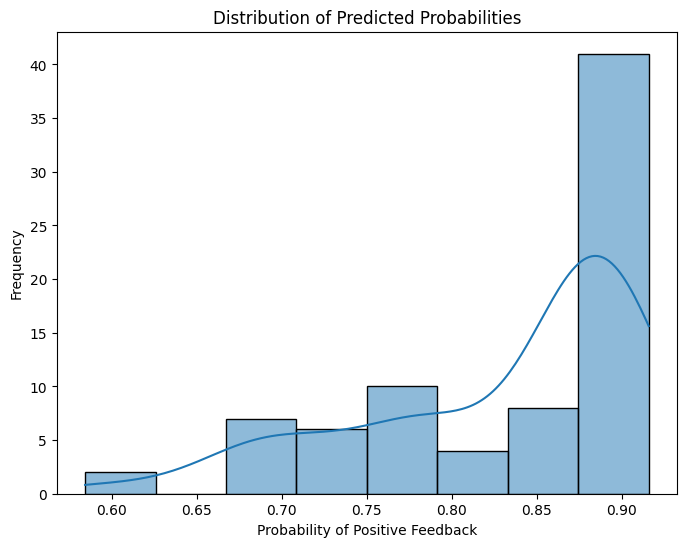

In [101]:
plt.figure(figsize=(8, 6))
sns.histplot(predicted_probabilities, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Probability of Positive Feedback')
plt.ylabel('Frequency')
plt.show()